In [267]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Linear Regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
pd.options.display.float_format = '{:,.4f}'.format

wineWhite = pd.read_csv('./processeddata/WhiteWine.csv', skipinitialspace=True, index_col=0)
wineRed = pd.read_csv('./processeddata/RedWine.csv', skipinitialspace=True, index_col=0)

### Splitting up test and training set

In [268]:
X_wineWhite_help = wineWhite.loc[:, wineWhite.columns != "Categorical Quality"]
X_wineWhite = X_wineWhite_help.loc[:, X_wineWhite_help.columns != "quality"]
X_wineWhite = X_wineWhite.loc[:, X_wineWhite.columns != 'alcohol']
y_wineWhite = wineWhite["alcohol"]

In [269]:
X_wineRed_help = wineRed.loc[:, wineRed.columns != "Categorical Quality"]
X_wineRed = X_wineRed_help.loc[:, X_wineRed_help.columns != "quality"]
X_wineRed = X_wineRed.loc[:, X_wineRed.columns != 'alcohol']
y_wineRed = wineRed["alcohol"]

In [270]:
X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test = train_test_split(X_wineWhite, y_wineWhite, test_size=0.2)


In [271]:
X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test = train_test_split(X_wineRed, y_wineRed, test_size=0.2)


### (a) K-Cross Validation for Multivariate Linear Regression Modeling

### White Wine

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=None, shuffle=True)
R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]

    print('round: ', count)
    count = count + 1
    linreg = LinearRegression().fit(X_train_cv, y_train_cv)

    print('White Wine dataset')
    print('R-squared score (training): {:.3f}'.format(linreg.score(X_train_cv, y_train_cv)))
    R_Squared_score_training.append(linreg.score(X_train_cv, y_train_cv))
    print('R-squared score (validation test): {:.3f}'.format(linreg.score(X_test_cv, y_test_cv)))
    R_Squared_score_validation.append(linreg.score(X_test_cv, y_test_cv))
    
    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))                                  

    print('linear model intercept: {}'.format(linreg.intercept_))
    print('linear model coeff:\n{}'.format(linreg.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))
    print('**************************************************************')

print("Average White Wine Dataset")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)



round:  1
White Wine dataset
R-squared score (training): 0.844
R-squared score (validation test): 0.901
RMSE: 0.377
linear model intercept: 664.049231140239
linear model coeff:
[ 5.09928443e-01  1.00248232e+00  4.48683659e-01  2.39535098e-01
 -8.26924002e-01 -3.51714761e-03 -1.11617158e-04 -6.71045253e+02
  2.42544601e+00  1.04884575e+00]
Number of non-zero features: 10
**************************************************************
round:  2
White Wine dataset
R-squared score (training): 0.842
R-squared score (validation test): 0.913
RMSE: 0.366
linear model intercept: 666.7805084001834
linear model coeff:
[ 5.10056720e-01  9.55275139e-01  4.75807247e-01  2.42122904e-01
 -5.32829244e-01 -3.73211751e-03 -1.77713121e-06 -6.73863732e+02
  2.43933423e+00  1.03655756e+00]
Number of non-zero features: 10
**************************************************************
round:  3
White Wine dataset
R-squared score (training): 0.842
R-squared score (validation test): 0.911
RMSE: 0.378
linear mode

[[-0.66998957 -0.34796417 -0.3736056  -0.37924015 -0.35902235 -0.37814782
  -0.3606245  -0.37820161 -0.64527577 -0.34640043]
 [-0.63294097 -0.35329215 -0.36482757 -0.38300941 -0.37535377 -0.37424965
  -0.35899812 -0.37407879 -0.62278257 -0.34669438]
 [-0.59588421 -0.35822459 -0.36531498 -0.37632324 -0.37259826 -0.37834678
  -0.36093498 -0.37054933 -0.59326332 -0.3541422 ]
 [-0.57061179 -0.35135971 -0.3596067  -0.3745407  -0.36430748 -0.37117546
  -0.36544731 -0.36733458 -0.57251206 -0.35829665]
 [-0.55219943 -0.36195361 -0.36513683 -0.37110883 -0.36228086 -0.37020277
  -0.36862521 -0.36898743 -0.55414475 -0.36171223]
 [-0.54346639 -0.36106552 -0.36286214 -0.36858514 -0.37681581 -0.37199567
  -0.36841323 -0.37117864 -0.54037798 -0.36441329]
 [-0.52772406 -0.36632936 -0.36321919 -0.53341048 -0.37211456 -0.37001679
  -0.36741512 -0.36691323 -0.52949113 -0.37184551]
 [-0.51644141 -0.37188724 -0.37216187 -0.51967916 -0.37116089 -0.36995378
  -0.51107078 -0.5114429  -0.51907854 -0.37315753]


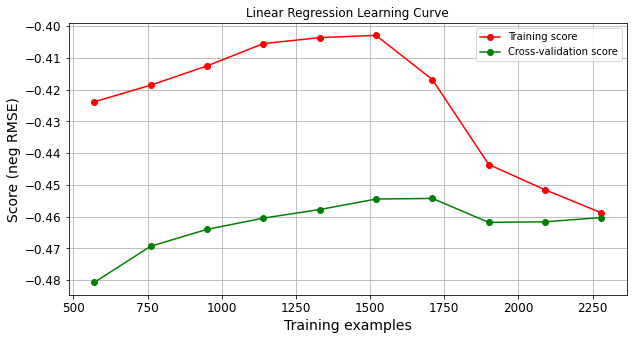

In [273]:
from sklearn.model_selection import learning_curve

linreg = LinearRegression().fit(X_wineWhite_train, y_wineWhite_train)
train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linreg, X_wineWhite_train, y_wineWhite_train, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Modeling with test set

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


linreg = LinearRegression().fit(X_wineWhite_test, y_wineWhite_test)

print('White Wine dataset')
print('R-squared score (test set): {:.3f}'.format(linreg.score(X_wineWhite_test, y_wineWhite_test)))
#R_Squared_score_training.append(linreg.score(X_wineWhite_test, y_wineWhite_test))
#print('R-squared score (validation test): {:.3f}'.format(linreg.score(X_wineWhite_test, y_wineWhite_test)))
#R_Squared_score_validation.append(linreg.score(X_wineWhite_test, y_wineWhite_test))

# make predictions on the testing set
y_pred = linreg.predict(X_wineWhite_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred))))
#RMSE.append(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred)))                                  

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))
print('**************************************************************')



White Wine dataset
R-squared score (test set): 0.899
RMSE: 0.390
linear model intercept: 726.0297442057547
linear model coeff:
[ 4.90232200e-01  5.23568008e-01  3.22284851e-01  2.47987096e-01
  3.23226964e-01 -3.01390250e-03  1.26145639e-03 -7.33182989e+02
  2.36064763e+00  9.32946905e-01]
Number of non-zero features: 10
**************************************************************


[[-0.38871943 -0.37816721 -0.39836802 -0.6354147  -0.37473578 -0.37584237
  -0.36792697 -0.41301121 -0.37329537 -0.36212671]
 [-0.37918541 -0.38864344 -0.39157523 -0.59272635 -0.37200623 -0.3754471
  -0.37256276 -0.4111949  -0.36456103 -0.37693591]
 [-0.40428206 -0.56592901 -0.38532002 -0.56368528 -0.37307411 -0.37587961
  -0.38087481 -0.39976621 -0.36843737 -0.3734562 ]
 [-0.5539039  -0.54817288 -0.37813902 -0.54016718 -0.5537502  -0.38213753
  -0.37939617 -0.39217517 -0.3817892  -0.39239734]
 [-0.53724448 -0.54058809 -0.38171833 -0.52614992 -0.53624299 -0.37463596
  -0.38955533 -0.38447566 -0.38291208 -0.38713846]
 [-0.5201058  -0.52553099 -0.37485625 -0.51196535 -0.52402193 -0.37436346
  -0.388659   -0.38440429 -0.38309169 -0.52727155]
 [-0.50771584 -0.51224987 -0.37217495 -0.50063241 -0.50994824 -0.37258251
  -0.38441943 -0.37948361 -0.38118729 -0.51223822]
 [-0.49808981 -0.50248484 -0.37255795 -0.49059495 -0.50183195 -0.3775112
  -0.38241843 -0.38016584 -0.51194986 -0.50208471]
 [

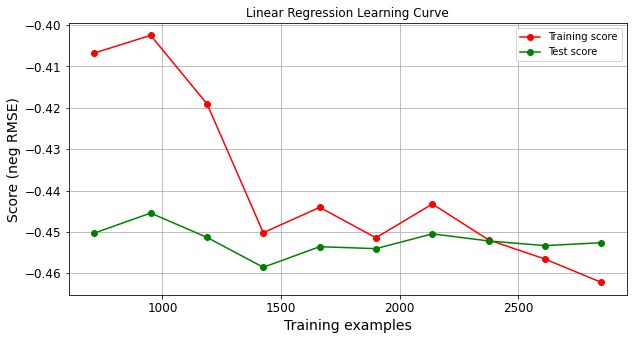

In [275]:
from sklearn.model_selection import learning_curve

linreg = LinearRegression().fit(X_wineWhite, y_wineWhite)
train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linreg, X_wineWhite, y_wineWhite, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Red Wine

In [276]:
R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]

    print('round: ', count)
    count = count + 1
    linreg = LinearRegression().fit(X_train_cv, y_train_cv)

    print('White Wine dataset')
    print('R-squared score (training): {:.3f}'.format(linreg.score(X_train_cv, y_train_cv)))
    R_Squared_score_training.append(linreg.score(X_train_cv, y_train_cv))
    print('R-squared score (validation test): {:.3f}'.format(linreg.score(X_test_cv, y_test_cv)))
    R_Squared_score_validation.append(linreg.score(X_test_cv, y_test_cv))
    
    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('linear model intercept: {}'.format(linreg.intercept_))
    print('linear model coeff:\n{}'.format(linreg.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))
    print('**************************************************************')
    
print("Average Red Wine Dataset")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

round:  1
White Wine dataset
R-squared score (training): 0.673
R-squared score (validation test): 0.692
RMSE: 0.602
linear model intercept: 604.9605734900196
linear model coeff:
[ 5.35069313e-01  2.44370639e-01  6.22997355e-01  2.74415173e-01
 -1.10056638e+00 -2.18872481e-03 -2.73022096e-03 -6.15105436e+02
  3.77760293e+00  1.30569367e+00]
Number of non-zero features: 10
**************************************************************
round:  2
White Wine dataset
R-squared score (training): 0.682
R-squared score (validation test): 0.608
RMSE: 0.650
linear model intercept: 610.1664859908282
linear model coeff:
[ 5.46341294e-01  2.08508706e-01  6.18175046e-01  2.77563812e-01
 -1.14372689e+00 -3.24295748e-03 -2.42117686e-03 -6.20530274e+02
  3.80547874e+00  1.35486103e+00]
Number of non-zero features: 10
**************************************************************
round:  3
White Wine dataset
R-squared score (training): 0.661
R-squared score (validation test): 0.741
RMSE: 0.665
linear mod

[[-0.51366408 -0.59967798 -0.60450946 -0.57756436 -0.57305076 -0.56900171
  -0.57745774 -0.58115606 -0.59168333 -0.53035318]
 [-0.59444876 -0.63015635 -0.599054   -0.54939796 -0.5829775  -0.59224194
  -0.55330933 -0.58445029 -0.57749151 -0.55689291]
 [-0.59113422 -0.63640188 -0.61042636 -0.59712077 -0.59899262 -0.62271538
  -0.55346628 -0.62304724 -0.56102954 -0.55046419]
 [-0.60155736 -0.63340055 -0.62889178 -0.59968397 -0.60255375 -0.59340753
  -0.57753699 -0.61074326 -0.57549326 -0.56342203]
 [-0.59962986 -0.62681215 -0.6385984  -0.59998907 -0.5966943  -0.59099025
  -0.58809042 -0.61494599 -0.61628883 -0.57141178]
 [-0.60248666 -0.63069094 -0.64631145 -0.61548076 -0.59354152 -0.60589719
  -0.59855446 -0.59734897 -0.61203298 -0.58065256]
 [-0.59641515 -0.63294451 -0.6396668  -0.6070836  -0.59357058 -0.59868377
  -0.60078294 -0.59770439 -0.61379363 -0.58644057]
 [-0.60385192 -0.62494935 -0.62893373 -0.60500654 -0.59957663 -0.59968132
  -0.61356668 -0.60017619 -0.60994871 -0.59491804]


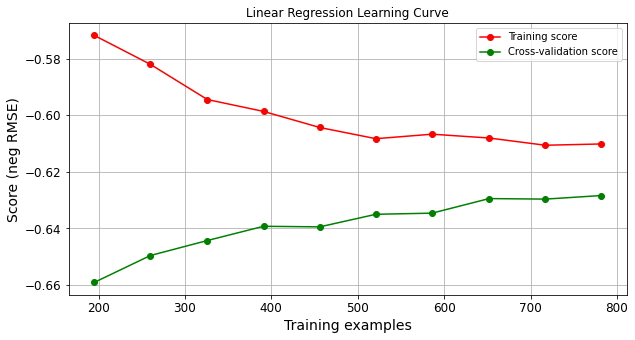

In [277]:
from sklearn.model_selection import learning_curve

linreg = LinearRegression().fit(X_wineRed_train, y_wineRed_train)
train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linreg, X_wineRed_train, y_wineRed_train, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Modeling with test set 

In [278]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


linreg = LinearRegression().fit(X_wineRed_test, y_wineRed_test)

print('White Wine dataset')
print('R-squared score (test set): {:.3f}'.format(linreg.score(X_wineRed_test, y_wineRed_test)))
#R_Squared_score_training.append(linreg.score(X_wineWhite_test, y_wineWhite_test))
#print('R-squared score (validation test): {:.3f}'.format(linreg.score(X_wineWhite_test, y_wineWhite_test)))
#R_Squared_score_validation.append(linreg.score(X_wineWhite_test, y_wineWhite_test))

# make predictions on the testing set
y_pred = linreg.predict(X_wineRed_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineRed_test, y_pred))))
#RMSE.append(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred)))                                  

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))
print('**************************************************************')


White Wine dataset
R-squared score (test set): 0.719
RMSE: 0.579
linear model intercept: 618.9470650147446
linear model coeff:
[ 4.96443706e-01  5.77501397e-01  1.20958390e+00  3.33725766e-01
 -1.80308964e+00  1.01895886e-03 -2.15882054e-03 -6.28863697e+02
  3.68677270e+00  1.09213857e+00]
Number of non-zero features: 10
**************************************************************


[[-0.57462855 -0.64723662 -0.56584996 -0.60136155 -0.59325314 -0.60643768
  -0.54450944 -0.5672202  -0.57634112 -0.58855186]
 [-0.56129751 -0.63534858 -0.5722443  -0.58620581 -0.59413035 -0.59004287
  -0.56941759 -0.54757695 -0.57004832 -0.58592083]
 [-0.57699896 -0.61237729 -0.56770834 -0.57818326 -0.60385635 -0.61502663
  -0.57578326 -0.57868121 -0.58554281 -0.58876101]
 [-0.59132042 -0.62445236 -0.57920946 -0.58032193 -0.60874388 -0.61326144
  -0.57394661 -0.58647484 -0.59745459 -0.5992509 ]
 [-0.59758506 -0.62069495 -0.5771402  -0.57829764 -0.62156558 -0.60317608
  -0.58711591 -0.59210009 -0.5925485  -0.60813661]
 [-0.61387193 -0.61555812 -0.57917067 -0.58327762 -0.62155085 -0.61640491
  -0.6043237  -0.60480533 -0.59137773 -0.6256655 ]
 [-0.61742364 -0.61601305 -0.57119645 -0.5853235  -0.6214162  -0.61127024
  -0.60520326 -0.60995446 -0.59810023 -0.61909079]
 [-0.62207069 -0.62614597 -0.57981013 -0.58340353 -0.61335733 -0.62535711
  -0.6036311  -0.61425394 -0.60558623 -0.62036408]


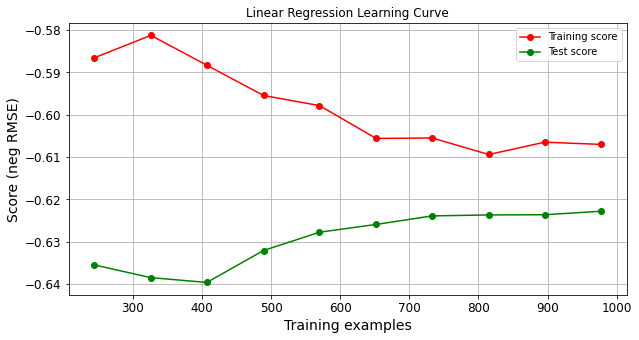

In [279]:
from sklearn.model_selection import learning_curve

linreg = LinearRegression().fit(X_wineRed, y_wineRed)
train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linreg, X_wineRed, y_wineRed, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### (b) K-Cross Validation for Multivariate Linear Regression Model with Gradient Descent

### Batch Gradient Descent

In [280]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "gradientDescent"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


### White Wine

In [281]:
kf = KFold(n_splits=10, random_state=None, shuffle=True)

# def gradientDescent(x, y, theta, alpha, iters):
#     for x in range(iters):
#         h = x * theta.T
#         theta_zero = theta[:,0]- alpha* 1/len(y)*np.sum((h-y))
#         theta_one  = theta[:,1]- alpha* 1/len(y)*np.sum((h-y)*x[:,1])
#         theta = np.matrix(np.array([theta_zero,theta_one]))
#     return theta
    

for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]
    
    X_b = np.c_[np.ones((2851, 1)), X_train_cv] 
    
    # learning rate
    alpha = 0.05

#         # number of iterations
#         n_iter = 1000

#         # the number of data points
#         n = 100

#         # random initialization to theta. 
#         # Return samples (2 values for theta0 and theta1) from the “standard normal” distribution.
    theta = np.random.randn(11, 1)
    print('initial theta: \n', theta)

#         # the process of gradient descent
#         for iteration in range(n_iter):
#             gradients = (1/n) * X_b.T.dot(X_b.dot(theta) - y_train_cv)
#             theta = theta - alpha*gradients

#         print('best theta: \n', theta)

    epsilon = 0.00001
    theta_diff = 1
    while theta_diff > epsilon:
        gradients = (1/X_b.shape[0]) * ((theta.dot(X_b.T) - y_train_cv.ravel()).T.dot(X_b)) 
#             gradientDescent(X_b, y_train_cv, theta, alpha, 10000)
        new_theta = theta - alpha*gradients
        theta_diff = theta_new - theta

    print('**************************************************************')

initial theta: 
 [[-1.98633955]
 [ 0.15029035]
 [ 0.18149429]
 [ 1.13534595]
 [ 0.35373493]
 [ 0.69557635]
 [-1.2377105 ]
 [-0.10750335]
 [ 1.30178668]
 [-0.49932002]
 [ 0.77348106]]


ValueError: shapes (11,1) and (11,2851) not aligned: 1 (dim 1) != 11 (dim 0)

### Regularized linear regression models with feature normalization

### Ridge Regression Model (L2 Penalty)

### White Wine

### No Normalization

In [282]:
from sklearn.linear_model import Ridge
kf = KFold(n_splits=10, random_state=None, shuffle=True)

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []


count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1
    
    linridge = Ridge().fit(X_train_cv, y_train_cv)

    print('White Wine dataset')

    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_cv, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_cv, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_cv, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_cv, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))
    
    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('*****************************************************************')
    
print("Average White Wine Dataset")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

round:  1
White Wine dataset
R-squared score (training): 0.352
R-squared score (test): 0.362
RMSE: 1.102
ridge regression linear model intercept: 14.597452948535356
ridge regression linear model coeff:
[-6.59068790e-02  1.73890871e+00  5.39090363e-01 -6.52700336e-02
 -8.85452250e+00  6.48461785e-03 -1.06586135e-02 -3.17004107e+00
  2.50201006e-01  3.06119676e-01]
Number of non-zero features: 10
*****************************************************************
round:  2
White Wine dataset
R-squared score (training): 0.353
R-squared score (test): 0.361
RMSE: 1.142
ridge regression linear model intercept: 14.95802982654473
ridge regression linear model coeff:
[-7.45638458e-02  1.73292553e+00  5.78389279e-01 -6.41409151e-02
 -9.11085266e+00  5.72719657e-03 -1.05983259e-02 -3.18035198e+00
  1.47945151e-01  3.94688672e-01]
Number of non-zero features: 10
*****************************************************************
round:  3
White Wine dataset
R-squared score (training): 0.353
R-squared 

[[-1.02418153 -0.92511027 -0.97164641 -1.02874971 -1.02171135 -0.9942352
  -1.03528594 -0.98660466 -1.01648575 -1.01820515]
 [-1.02349556 -0.95411767 -0.97069171 -1.03776362 -1.00069721 -0.979166
  -1.02905922 -0.98261023 -1.01108027 -1.00177282]
 [-1.01822105 -0.96945145 -0.95967762 -1.04207933 -0.99780352 -0.98799124
  -1.03001651 -0.99561775 -1.00523661 -0.9869889 ]
 [-1.00622063 -0.96501359 -0.96659082 -1.03193686 -0.99067311 -0.97199352
  -1.0224257  -0.99733261 -0.9981243  -0.99166734]
 [-1.00639136 -0.9695557  -0.96836433 -1.01027153 -0.99115618 -0.97403315
  -1.00595436 -0.9951127  -1.00223366 -0.99561433]
 [-1.00254443 -0.97065688 -0.97144932 -1.01819    -0.9878124  -0.96990738
  -1.00190071 -0.99972667 -1.0074552  -0.9897941 ]
 [-1.00029043 -0.98420766 -0.97079265 -1.00562699 -0.9894629  -0.97197302
  -0.99685706 -0.99409818 -0.99537533 -0.99532125]
 [-0.99608987 -0.99151688 -0.97011751 -1.00597747 -0.98241452 -0.97432806
  -0.98798051 -0.98981484 -0.99121258 -0.9917779 ]
 [-

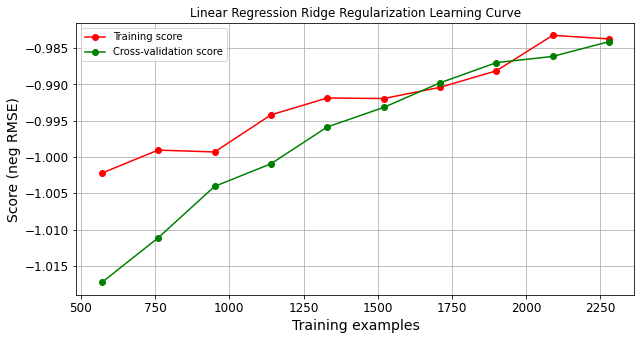

In [283]:
from sklearn.model_selection import learning_curve

linridge = Ridge().fit(X_wineWhite_train, y_wineWhite_train)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_wineWhite_train, y_wineWhite_train, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Ridge Regularization Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Ridge Regularization with Normalization

In [284]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1
    
    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)

    linridge = Ridge().fit(X_train_scaled, y_train_cv)

    print('White Wine dataset')
    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))
    
    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('*************************************************************')
    
print("Average White Wine Dataset with Normalization")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

round:  1
White Wine dataset
R-squared score (training): 0.759
R-squared score (test): 0.780
RMSE: 1.098
ridge regression linear model intercept: 11.281916735920538
ridge regression linear model coeff:
[  1.66975922   1.35697448   0.90523488   6.69301974  -2.06612055
   0.11919033  -1.32800942 -20.27570101   1.41216228   0.63828419]
Number of non-zero features: 10
*************************************************************
round:  2
White Wine dataset
R-squared score (training): 0.763
R-squared score (test): 0.751
RMSE: 1.165
ridge regression linear model intercept: 11.278195752820132
ridge regression linear model coeff:
[  1.98031146   1.25150411   0.66160623   6.71453615  -2.2668823
   0.04317918  -1.32771085 -20.29958194   1.5289812    0.60477263]
Number of non-zero features: 10
*************************************************************
round:  3
White Wine dataset
R-squared score (training): 0.763
R-squared score (test): 0.773
RMSE: 1.157
ridge regression linear model intercep

### Find best alpha

In [285]:
X_wineWhite_train, X_wineWhite_testCV, y_wineWhite_train, y_wineWhite_testCV = train_test_split(X_wineWhite_train, y_wineWhite_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineWhite_train)
X_test_scaled = scaler.transform(X_wineWhite_testCV)

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0,0.01, 0.05, 0.1, 0.5, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_wineWhite_train)
    r2_train = linridge.score(X_train_scaled, y_wineWhite_train)
    r2_test = linridge.score(X_test_scaled, y_wineWhite_testCV)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.4f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.4f}, r-squared test: {:.4f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.0000
num abs(coeff) > 1.0: 5, r-squared training: 0.8383, r-squared test: 0.8931

Alpha = 0.0100
num abs(coeff) > 1.0: 5, r-squared training: 0.8383, r-squared test: 0.8924

Alpha = 0.0500
num abs(coeff) > 1.0: 5, r-squared training: 0.8375, r-squared test: 0.8892

Alpha = 0.1000
num abs(coeff) > 1.0: 5, r-squared training: 0.8353, r-squared test: 0.8843

Alpha = 0.5000
num abs(coeff) > 1.0: 6, r-squared training: 0.7970, r-squared test: 0.8322

Alpha = 1.0000
num abs(coeff) > 1.0: 7, r-squared training: 0.7435, r-squared test: 0.7702

Alpha = 10.0000
num abs(coeff) > 1.0: 4, r-squared training: 0.4772, r-squared test: 0.4738

Alpha = 20.0000
num abs(coeff) > 1.0: 4, r-squared training: 0.4014, r-squared test: 0.3914

Alpha = 50.0000
num abs(coeff) > 1.0: 3, r-squared training: 0.2941, r-squared test: 0.2823

Alpha = 100.0000
num abs(coeff) > 1.0: 2, r-squared training: 0.2104, r-squared test: 0.2009

Alpha = 1000.00

### LR with Ridge Regression, Normalization, and optimal alpha

In [286]:
R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1

    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)


    linridge = Ridge(alpha=1).fit(X_train_scaled, y_train_cv)

    print('White Wine dataset')
    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('******************************************************************')
    
print("Average White Wine Dataset with Normalization and Optimal Alpha")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

round:  1
White Wine dataset
R-squared score (training): 0.729
R-squared score (test): 0.743
RMSE: 1.120
ridge regression linear model intercept: 11.294255397785788
ridge regression linear model coeff:
[  1.70676121   1.36744849   0.9142293    5.71333127  -2.09134231
   0.08333211  -1.43306093 -18.24285423   1.37824409   0.56492544]
Number of non-zero features: 10
******************************************************************
round:  2
White Wine dataset
R-squared score (training): 0.725
R-squared score (test): 0.770
RMSE: 1.127
ridge regression linear model intercept: 11.287890394877609
ridge regression linear model coeff:
[  1.46315425   1.46105529   0.91600371   5.8062919   -2.16379853
   0.05371666  -1.47921342 -18.19430803   1.33388325   0.54585823]
Number of non-zero features: 10
******************************************************************
round:  3
White Wine dataset
R-squared score (training): 0.728
R-squared score (test): 0.785
RMSE: 1.147
ridge regression linear mod

[[-0.99338252 -0.98269166 -1.04997297 -1.01529047 -0.95659626 -0.96080487
  -0.95612722 -1.02624849 -1.00414347 -1.026624  ]
 [-1.00001281 -1.00784676 -1.04425188 -1.03455524 -0.97519225 -0.99489854
  -0.99012248 -1.02628148 -1.02491143 -1.01057769]
 [-0.98938683 -1.02538771 -1.04405051 -1.01805343 -0.97836131 -1.00301663
  -0.98013837 -1.03369237 -1.01145764 -1.0118493 ]
 [-0.99389924 -1.01293473 -1.03183127 -1.01723042 -0.97862169 -1.01289054
  -0.98293619 -1.02105124 -1.01351683 -1.01210335]
 [-0.99656391 -1.02153938 -1.03446344 -1.00922459 -1.00108589 -1.01262287
  -1.01351805 -1.01334214 -1.02540699 -0.99801795]
 [-1.00022191 -1.02593003 -1.0275722  -1.00903598 -1.00766562 -1.01963132
  -1.02813247 -1.01080098 -1.0206295  -0.98810107]
 [-0.99640742 -1.02680859 -1.02470497 -1.0168481  -1.0047538  -1.0191249
  -1.02554413 -1.00578592 -1.00839872 -0.98943919]
 [-1.0056526  -1.02262516 -1.01907835 -1.00812924 -0.99928999 -1.01139917
  -1.02544137 -1.00119503 -1.00434308 -0.99094104]
 

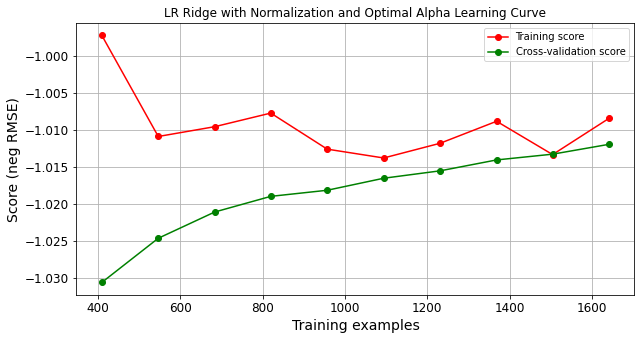

In [287]:
from sklearn.model_selection import learning_curve

X_wineWhite_train, X_wineWhite_testCV, y_wineWhite_train, y_wineWhite_testCV = train_test_split(X_wineWhite_train, y_wineWhite_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineWhite_train)
X_test_scaled = scaler.transform(X_wineWhite_testCV)

linridge = Ridge(alpha = 10).fit(X_train_scaled, y_wineWhite_train)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_train_cv, y_train_cv, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('LR Ridge with Normalization and Optimal Alpha Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### LR with Ridge Regression, Normalization, and optimal alpha Using Test Set

In [288]:
X_test_scaled = scaler.transform(X_wineWhite_test)
X_train_scaled = scaler.transform(X_wineWhite_train)


linridge = Ridge(alpha=1).fit(X_train_scaled, y_wineWhite_train)

print('White Wine dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_wineWhite_train)))
print('R-squared score (testing): {:.3f}'
     .format(linridge.score(X_test_scaled, y_wineWhite_test)))

# make predictions on the testing set
y_pred = linridge.predict(X_test_scaled)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
print('******************************************************************')
    

White Wine dataset
R-squared score (training): 0.713
R-squared score (testing): 0.733
RMSE: 0.634
ridge regression linear model intercept: 11.442591153186644
ridge regression linear model coeff:
[  1.42491583   1.46217069   0.79183526   5.24268207  -2.06672336
   0.18228579  -1.65903403 -17.37075388   1.26951259   0.50936613]
Number of non-zero features: 10
******************************************************************


[[-0.99492179 -0.81383711 -0.93862437 -0.92716315 -0.97063298 -0.94987164
  -0.94879918 -0.89955908 -0.93223263 -0.89057325]
 [-0.9368025  -0.82362664 -0.95474479 -0.89759345 -0.92716621 -0.90276315
  -0.93369014 -0.88837223 -0.90854161 -0.86699173]
 [-0.9034247  -0.81410308 -0.91085431 -0.87349329 -0.89587661 -0.88804311
  -0.90116078 -0.8819303  -0.88866119 -0.86134289]
 [-0.85874529 -0.80198096 -0.8753218  -0.84713189 -0.88387352 -0.86359882
  -0.88074325 -0.86048512 -0.88397616 -0.84239713]
 [-0.83882881 -0.82278042 -0.8543958  -0.83926587 -0.85949621 -0.84910465
  -0.86784829 -0.8451144  -0.86472511 -0.82653295]
 [-0.82834348 -0.8250063  -0.8407931  -0.82896445 -0.84662436 -0.83772381
  -0.83331579 -0.8292933  -0.85594713 -0.82521056]
 [-0.82512865 -0.81655457 -0.82331656 -0.81360137 -0.83234396 -0.81801095
  -0.82089972 -0.8079973  -0.84125226 -0.81643367]
 [-0.81493268 -0.80155135 -0.80594043 -0.80269751 -0.81571761 -0.81640783
  -0.81758465 -0.79919752 -0.82523496 -0.80434382]


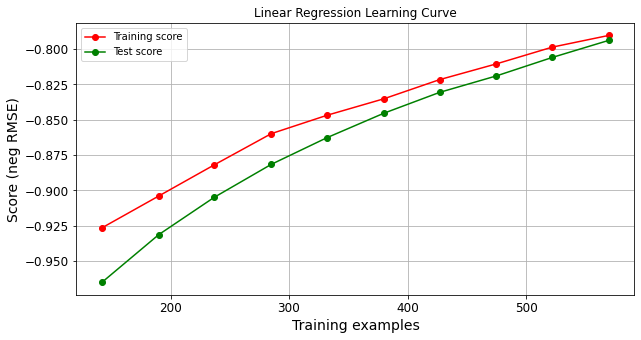

In [289]:
from sklearn.model_selection import learning_curve

X_test_scaled = scaler.transform(X_wineWhite_test)
linridge = Ridge(alpha=1).fit(X_test_scaled, y_wineWhite_test)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_test_scaled, y_wineWhite_test, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Red Wine

### No Normalization

In [290]:
from sklearn.linear_model import Ridge
kf = KFold(n_splits=10, random_state=None, shuffle=True)

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []


count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1
    
    linridge = Ridge().fit(X_train_cv, y_train_cv)

    print('Red Wine dataset')

    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_cv, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_cv, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_cv, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_cv, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))
    
    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('*****************************************************************')
    
print("Average Red Wine Dataset")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

round:  1
Red Wine dataset
R-squared score (training): 0.234
R-squared score (test): 0.242
RMSE: 0.633
ridge regression linear model intercept: 5.123504847394977
ridge regression linear model coeff:
[-0.04620699 -0.46918562  1.34725367  0.08717327 -3.3881245   0.00462321
 -0.00948285 -0.82290494  1.89122837  0.88425205]
Number of non-zero features: 10
*****************************************************************
round:  2
Red Wine dataset
R-squared score (training): 0.235
R-squared score (test): 0.246
RMSE: 0.644
ridge regression linear model intercept: 5.75468276516443
ridge regression linear model coeff:
[-0.07023428 -0.47206131  1.3312313   0.09647881 -3.64988584  0.00577211
 -0.00949328 -0.82995707  1.74780665  0.9218547 ]
Number of non-zero features: 10
*****************************************************************
round:  3
Red Wine dataset
R-squared score (training): 0.248
R-squared score (test): 0.071
RMSE: 0.559
ridge regression linear model intercept: 5.283256560037582

### Ridge Regularization with Normalization


In [291]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1
    
    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)

    linridge = Ridge().fit(X_train_scaled, y_train_cv)

    print('Red Wine dataset')
    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))
    
    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('*************************************************************')
    
print("Average Red Wine Dataset with Normalization")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

round:  1
Red Wine dataset
R-squared score (training): 0.653
R-squared score (test): 0.639
RMSE: 0.606
ridge regression linear model intercept: 10.299814066957449
ridge regression linear model coeff:
[ 4.17754564  0.19454987  0.73506363  2.99195957 -0.92604912 -0.01879418
 -1.20601025 -6.50056896  3.22426236  1.71430118]
Number of non-zero features: 10
*************************************************************
round:  2
Red Wine dataset
R-squared score (training): 0.662
R-squared score (test): 0.583
RMSE: 0.631
ridge regression linear model intercept: 9.87873526632936
ridge regression linear model coeff:
[ 4.22979443  0.23359778  0.97191917  3.27192247 -1.14461392 -0.1226812
 -1.06391467 -6.60542021  3.65939878  1.82230631]
Number of non-zero features: 10
*************************************************************
round:  3
Red Wine dataset
R-squared score (training): 0.664
R-squared score (test): 0.544
RMSE: 0.633
ridge regression linear model intercept: 9.840225614067052
ridge r

### Find best alpha

In [292]:
X_wineRed_train, X_wineRed_testCV, y_wineRed_train, y_wineRed_testCV = train_test_split(X_wineRed_train, y_wineRed_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineRed_train)
X_test_scaled = scaler.transform(X_wineRed_testCV)

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0,0.01, 0.05, 0.1, 0.5, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_wineRed_train)
    r2_train = linridge.score(X_train_scaled, y_wineRed_train)
    r2_test = linridge.score(X_test_scaled, y_wineRed_testCV)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.4f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.4f}, r-squared test: {:.4f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.0000
num abs(coeff) > 1.0: 5, r-squared training: 0.6705, r-squared test: 0.6891

Alpha = 0.0100
num abs(coeff) > 1.0: 5, r-squared training: 0.6705, r-squared test: 0.6891

Alpha = 0.0500
num abs(coeff) > 1.0: 5, r-squared training: 0.6704, r-squared test: 0.6889

Alpha = 0.1000
num abs(coeff) > 1.0: 5, r-squared training: 0.6701, r-squared test: 0.6884

Alpha = 0.5000
num abs(coeff) > 1.0: 5, r-squared training: 0.6623, r-squared test: 0.6796

Alpha = 1.0000
num abs(coeff) > 1.0: 7, r-squared training: 0.6462, r-squared test: 0.6627

Alpha = 10.0000
num abs(coeff) > 1.0: 2, r-squared training: 0.4278, r-squared test: 0.4399

Alpha = 20.0000
num abs(coeff) > 1.0: 1, r-squared training: 0.3251, r-squared test: 0.3331

Alpha = 50.0000
num abs(coeff) > 1.0: 0, r-squared training: 0.1960, r-squared test: 0.1980

Alpha = 100.0000
num abs(coeff) > 1.0: 0, r-squared training: 0.1195, r-squared test: 0.1185

Alpha = 1000.00

### LR with Ridge Regression, Normalization, and optimal alpha

In [293]:
R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1

    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)


    linridge = Ridge(alpha=0.1).fit(X_train_scaled, y_train_cv)

    print('Red Wine dataset')
    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('******************************************************************')
    
print("Average Red Wine Dataset with Normalization and Optimal Alpha")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

round:  1
Red Wine dataset
R-squared score (training): 0.674
R-squared score (test): 0.595
RMSE: 0.598
ridge regression linear model intercept: 9.694405903603418
ridge regression linear model coeff:
[ 6.11672952  0.36646819  0.47977114  3.62864162 -0.76440623 -0.15375576
 -0.58762451 -7.85846373  4.3443856   1.6398385 ]
Number of non-zero features: 10
******************************************************************
round:  2
Red Wine dataset
R-squared score (training): 0.678
R-squared score (test): 0.591
RMSE: 0.730
ridge regression linear model intercept: 9.785439212393646
ridge regression linear model coeff:
[ 5.71838584  0.43503921  0.60322392  3.86610413 -0.66851116 -0.10160469
 -0.74852467 -7.45616921  4.13666954  1.55164426]
Number of non-zero features: 10
******************************************************************
round:  3
Red Wine dataset
R-squared score (training): 0.673
R-squared score (test): 0.631
RMSE: 0.539
ridge regression linear model intercept: 9.697416792922

[[-0.87548637 -0.9840751  -0.8542297  -0.98364409 -0.81996937 -0.94817112
  -0.86456512 -0.91263584 -0.97791681 -0.90963595]
 [-0.88211381 -1.00791147 -0.90682652 -0.9402072  -0.8405317  -0.93674965
  -0.87875852 -0.87143138 -0.97031018 -0.89849359]
 [-0.9356554  -0.98969058 -0.93500083 -0.95826537 -0.86560044 -0.90710237
  -0.87149794 -0.89802987 -0.99343236 -0.89893892]
 [-0.94666628 -0.96384579 -0.94523643 -0.98632044 -0.8687005  -0.93927837
  -0.89735496 -0.90688548 -0.95768991 -0.90676521]
 [-0.9416069  -0.99132332 -0.98304003 -0.98815584 -0.87660821 -0.96093422
  -0.90084986 -0.91476771 -0.96341756 -0.90912122]
 [-0.93104442 -0.97788169 -0.95419752 -0.98557836 -0.89294296 -0.96136419
  -0.90214138 -0.93220593 -0.94600163 -0.92963511]
 [-0.92897179 -0.97218945 -0.94624784 -0.98402065 -0.92256139 -0.96548472
  -0.88575857 -0.92457843 -0.95433266 -0.93483678]
 [-0.93406075 -0.96708515 -0.94094153 -0.96575513 -0.91622829 -0.95847968
  -0.90079773 -0.92570647 -0.94314737 -0.93222263]


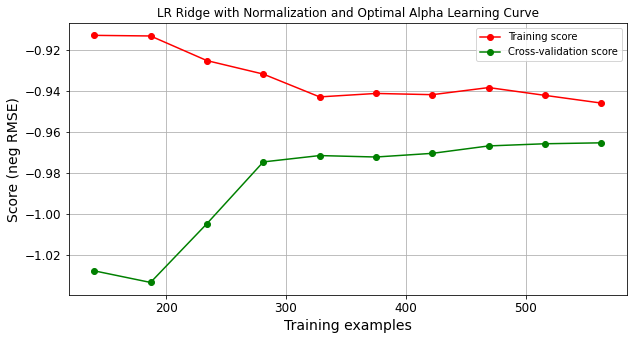

In [294]:
from sklearn.model_selection import learning_curve

X_wineRed_train, X_wineRed_testCV, y_wineRed_train, y_wineRed_testCV = train_test_split(X_wineRed_train, y_wineRed_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineRed_train)
X_test_scaled = scaler.transform(X_wineRed_testCV)

linridge = Ridge(alpha = 0.1).fit(X_train_scaled, y_wineRed_train)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_train_cv, y_train_cv, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('LR Ridge with Normalization and Optimal Alpha Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### LR with Ridge Regression, Normalization, and optimal alpha using test set

In [295]:
X_test_scaled = scaler.transform(X_wineRed_test)
X_train_scaled = scaler.transform(X_wineRed_train)

linridge = Ridge(alpha=1).fit(X_train_scaled, y_wineRed_train)

print('White Wine dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_wineRed_train)))
print('R-squared score (testing): {:.3f}'
     .format(linridge.score(X_test_scaled, y_wineRed_test)))

# make predictions on the testing set
y_pred = linridge.predict(X_test_scaled)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineRed_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
print('******************************************************************')

White Wine dataset
R-squared score (training): 0.629
R-squared score (testing): 0.674
RMSE: 0.624
ridge regression linear model intercept: 10.138542439120304
ridge regression linear model coeff:
[ 3.76001723e+00  2.24518415e-01  8.51720783e-01  3.02133118e+00
 -1.11057819e+00  7.20755454e-04 -9.96559755e-01 -5.71760553e+00
  2.82095771e+00  1.16769805e+00]
Number of non-zero features: 10
******************************************************************


[[-0.66151116 -0.8528673  -0.7137754  -0.76135813 -0.73885916 -0.82618945
  -0.69733141 -0.84763432 -0.86465975 -0.85861019]
 [-0.67376536 -0.7820449  -0.71437892 -0.72774419 -0.72951374 -0.81060306
  -0.67452897 -0.79921068 -0.81349932 -0.85061237]
 [-0.65063114 -0.79499914 -0.68972537 -0.73525767 -0.75098248 -0.76812866
  -0.67885872 -0.76166288 -0.82215059 -0.81733163]
 [-0.64976877 -0.74400249 -0.71883011 -0.72184617 -0.71965417 -0.74263449
  -0.66928895 -0.74003531 -0.77470214 -0.80482992]
 [-0.6723804  -0.71833484 -0.70249059 -0.71693841 -0.73341919 -0.74390938
  -0.66210581 -0.81015808 -0.74941843 -0.77813085]
 [-0.66110842 -0.71091409 -0.70714722 -0.68989075 -0.72059883 -0.72571035
  -0.66166519 -0.78043484 -0.71743694 -0.75321287]
 [-0.67241432 -0.74452273 -0.69784681 -0.67877514 -0.71253443 -0.69478654
  -0.69772145 -0.75823315 -0.69357001 -0.73129939]
 [-0.65110181 -0.72239494 -0.70075548 -0.67473967 -0.70849234 -0.69564048
  -0.68342439 -0.73130812 -0.67447483 -0.7197906 ]


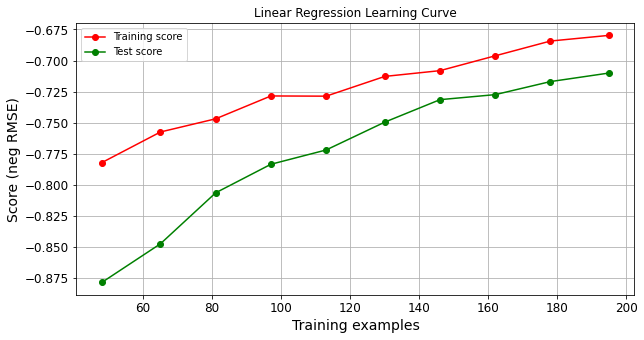

In [296]:
from sklearn.model_selection import learning_curve

X_test_scaled = scaler.transform(X_wineRed_test)
linridge = Ridge(alpha=1).fit(X_test_scaled, y_wineRed_test)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_test_scaled, y_wineRed_test, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Lasso Regression Model ( L1 Penalty)

### White Wine

### Optimal Parameter Alpha

In [297]:
from sklearn.linear_model import Lasso
X_wineWhite_train, X_wineWhite_testCV, y_wineWhite_train, y_wineWhite_testCV = train_test_split(X_wineWhite_train, y_wineWhite_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineWhite_train)
X_test_scaled = scaler.transform(X_wineWhite_testCV)

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.00005, 0.0001, 0.0005, 0.001,0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]:
    linlasso = Lasso(alpha, max_iter = 100000).fit(X_train_scaled, y_wineWhite_train)
    r2_train = linlasso.score(X_train_scaled, y_wineWhite_train)
    r2_test = linlasso.score(X_test_scaled, y_wineWhite_testCV)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00
Features kept: 10, r-squared training: 0.91, r-squared test: 0.39

Alpha = 0.00
Features kept: 10, r-squared training: 0.91, r-squared test: 0.39

Alpha = 0.00
Features kept: 10, r-squared training: 0.91, r-squared test: 0.40

Alpha = 0.00
Features kept: 9, r-squared training: 0.91, r-squared test: 0.40

Alpha = 0.01
Features kept: 6, r-squared training: 0.89, r-squared test: 0.41

Alpha = 0.01
Features kept: 5, r-squared training: 0.84, r-squared test: 0.39

Alpha = 0.01
Features kept: 3, r-squared training: 0.76, r-squared test: 0.34

Alpha = 0.02
Features kept: 2, r-squared training: 0.71, r-squared test: 0.32

Alpha = 0.03
Features kept: 2, r-squared training: 0.67, r-squared test: 0.30

Alpha = 0.03
Features kept: 2, r-squared training: 0.62, r-squared test: 0.27

Alpha = 0.04
Features kept: 1, r-squared training: 0.61, r-squared test: 0.28

Alpha = 0.04
Features kept

### Lasso Regression with Optimal Alpha

In [298]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1

    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)

    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_train_cv)

    print('White wine dataset')

    print('R-squared score (training): {:.3f}'
         .format(linlasso.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linlasso.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}\n'
         .format(linlasso.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linlasso.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
    print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

    print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))

    print('Features with non-zero weight (sorted by absolute magnitude):')
    for e in sorted (list(zip(list(X_wineWhite_train), linlasso.coef_)),
                    key = lambda e: -abs(e[1])):
        if e[1] != 0:
            print('\t{}, {:.3f}'.format(e[0], e[1]))

    print('******************************************************************')
    
print('Average White Wine')
print('R-Squared (training): {:.3f}'.format(sum(R_Squared_score_training)/10))
print('R-Squared (testing): {:.3f}'.format(sum(R_Squared_score_validation)/10))
print('RMSE: {:.3f}'.format(sum(RMSE)/10))





round:  1
White wine dataset
R-squared score (training): 0.838
R-squared score (test): 0.824

RMSE: 1.122
lasso regression linear model intercept: 12.499921802431253
lasso regression linear model coeff:
[ 1.49987232  0.          0.          3.13999195 -0.         -0.
 -0.         -8.04624498  0.78279874  0.2249712 ]
Non-zero features: 5
Features with non-zero weight (sorted by absolute magnitude):
	density, -8.046
	residual sugar, 3.140
	fixed acidity, 1.500
	pH, 0.783
	sulphates, 0.225
******************************************************************
round:  2
White wine dataset
R-squared score (training): 0.840
R-squared score (test): 0.832

RMSE: 1.154
lasso regression linear model intercept: 12.430254670477284
lasso regression linear model coeff:
[ 1.55517939  0.          0.          3.2119621  -0.         -0.
 -0.         -8.09215831  0.85422122  0.19358407]
Non-zero features: 5
Features with non-zero weight (sorted by absolute magnitude):
	density, -8.092
	residual sugar, 3.212


[[-0.50024559 -0.46662155 -0.47058789 -0.49835022 -0.48084988 -0.49505002
  -0.51182278 -0.4874448  -0.49681085 -0.48470541]
 [-0.5065798  -0.46758073 -0.47958171 -0.50327513 -0.48272391 -0.49494906
  -0.50487475 -0.47309092 -0.50150014 -0.49781386]
 [-0.49623108 -0.46440965 -0.48547882 -0.50269953 -0.48653452 -0.50176494
  -0.502613   -0.48798217 -0.4919408  -0.49307659]
 [-0.48774065 -0.46608672 -0.49105709 -0.49574733 -0.49019907 -0.48883623
  -0.50327496 -0.48191814 -0.48531048 -0.48951408]
 [-0.49238312 -0.47334952 -0.49340464 -0.49363477 -0.48507825 -0.48823088
  -0.49656511 -0.48039307 -0.48421952 -0.49123901]
 [-0.49236808 -0.4720556  -0.48870888 -0.4964098  -0.48996197 -0.48788321
  -0.49305303 -0.48964821 -0.49001367 -0.49370176]
 [-0.49203013 -0.47397231 -0.48709603 -0.49703851 -0.49440379 -0.48590462
  -0.49571265 -0.4939081  -0.49567455 -0.49413563]
 [-0.49379293 -0.47747046 -0.49127507 -0.4939442  -0.49262761 -0.48963507
  -0.49214699 -0.48671302 -0.49070366 -0.49249638]


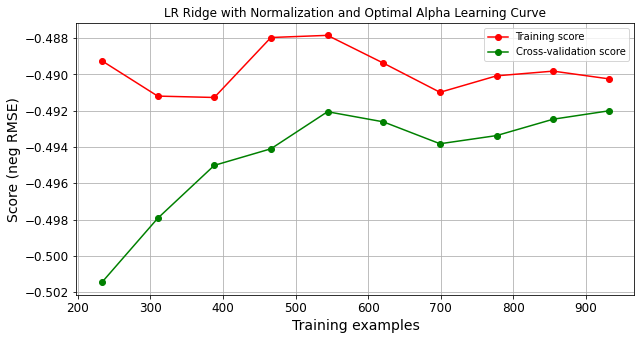

In [299]:
from sklearn.model_selection import learning_curve

X_wineWhite_trainCV, X_wineWhite_testCV, y_wineWhite_trainCV, y_wineWhite_testCV = train_test_split(X_wineWhite_train, y_wineWhite_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineWhite_trainCV)
X_test_scaled = scaler.transform(X_wineWhite_testCV)

linLasso = Lasso(alpha = 0.01).fit(X_train_scaled, y_wineWhite_trainCV)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linLasso, X_train_scaled, y_wineWhite_trainCV, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('LR Ridge with Normalization and Optimal Alpha Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Lasso Regression with Optimal Alpha using Test Set

In [300]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_wineWhite_train)
X_test_scaled = scaler.fit_transform(X_wineWhite_test)

linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_wineWhite_train)

print('White Wine dataset')
print('R-squared score (training): {:.3f}\n'
     .format(linlasso.score(X_train_scaled, y_wineWhite_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_wineWhite_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test_scaled)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred))))

print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))

print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_wineWhite_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
print('******************************************************************')



White Wine dataset
R-squared score (training): 0.838

R-squared score (test): 0.751

RMSE: 327.985
lasso regression linear model intercept: 12.438246898466696
lasso regression linear model coeff:
[ 1.53598434  0.          0.          3.17250405 -0.         -0.
 -0.         -8.0683301   0.84062613  0.19711968]
Non-zero features: 5
Features with non-zero weight (sorted by absolute magnitude):
	density, -8.068
	residual sugar, 3.173
	fixed acidity, 1.536
	pH, 0.841
	sulphates, 0.197
******************************************************************


[[-0.53304849 -0.49567464 -0.46779019 -0.46212901 -0.52649861 -0.53479559
  -0.56261404 -0.51399071 -0.4984174  -0.53621911]
 [-0.52038206 -0.49380967 -0.4769532  -0.47214536 -0.51407606 -0.57124908
  -0.55246405 -0.51506181 -0.51512128 -0.526907  ]
 [-0.51216111 -0.48389636 -0.47096319 -0.47443592 -0.51158636 -0.56019846
  -0.53274552 -0.50164709 -0.51609732 -0.52527056]
 [-0.50555502 -0.48523274 -0.5316107  -0.47794236 -0.51380045 -0.54819303
  -0.52980923 -0.49497804 -0.5054999  -0.52067804]
 [-0.54354589 -0.48737313 -0.52986211 -0.48392218 -0.49937881 -0.53176471
  -0.52813167 -0.48895911 -0.50335    -0.52597482]
 [-0.53273423 -0.48963755 -0.52517255 -0.48373633 -0.49396665 -0.52440818
  -0.52623222 -0.48414655 -0.50117898 -0.52861983]
 [-0.52472953 -0.4938294  -0.52195986 -0.47993634 -0.50108451 -0.52149411
  -0.51814655 -0.48766879 -0.52833632 -0.52156767]
 [-0.51617229 -0.49648554 -0.51105718 -0.48062212 -0.49463251 -0.51881014
  -0.51243455 -0.4869496  -0.52354995 -0.51550648]


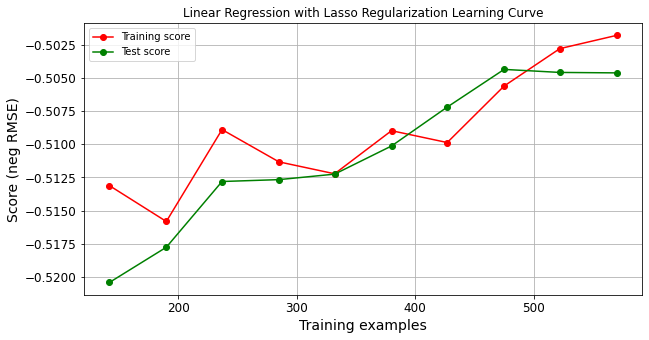

In [301]:
from sklearn.model_selection import learning_curve

X_test_scaled = scaler.transform(X_wineWhite_test)
linLasso = Lasso(alpha=0.01).fit(X_test_scaled, y_wineWhite_test)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linLasso, X_test_scaled, y_wineWhite_test, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression with Lasso Regularization Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Red Wine

### Optimal Parameter Alpha

In [302]:
from sklearn.linear_model import Lasso
X_wineRed_train, X_wineRed_testCV, y_wineRed_train, y_wineRed_testCV = train_test_split(X_wineRed_train, y_wineRed_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineRed_train)
X_test_scaled = scaler.transform(X_wineRed_testCV)

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.00005, 0.0001, 0.0005, 0.001,0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]:
    linlasso = Lasso(alpha, max_iter = 100000).fit(X_train_scaled, y_wineRed_train)
    r2_train = linlasso.score(X_train_scaled, y_wineRed_train)
    r2_test = linlasso.score(X_test_scaled, y_wineRed_testCV)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00
Features kept: 10, r-squared training: 0.66, r-squared test: 0.67

Alpha = 0.00
Features kept: 10, r-squared training: 0.66, r-squared test: 0.67

Alpha = 0.00
Features kept: 10, r-squared training: 0.66, r-squared test: 0.67

Alpha = 0.00
Features kept: 10, r-squared training: 0.65, r-squared test: 0.66

Alpha = 0.01
Features kept: 9, r-squared training: 0.63, r-squared test: 0.63

Alpha = 0.01
Features kept: 8, r-squared training: 0.56, r-squared test: 0.54

Alpha = 0.01
Features kept: 8, r-squared training: 0.45, r-squared test: 0.39

Alpha = 0.02
Features kept: 6, r-squared training: 0.32, r-squared test: 0.24

Alpha = 0.03
Features kept: 5, r-squared training: 0.26, r-squared test: 0.18

Alpha = 0.03
Features kept: 2, r-squared training: 0.22, r-squared test: 0.14

Alpha = 0.04
Features kept: 2, r-squared training: 0.19, r-squared test: 0.11

Alpha = 0.04
Features kep

### Lasso Regression with Optimal Alpha

In [303]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1

    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)

    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_train_cv)

    print('Wine dataset')

    print('R-squared score (training): {:.3f}'
         .format(linlasso.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linlasso.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}\n'
         .format(linlasso.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linlasso.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
    print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

    print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))

    print('Features with non-zero weight (sorted by absolute magnitude):')
    for e in sorted (list(zip(list(X_wineRed_train), linlasso.coef_)),
                    key = lambda e: -abs(e[1])):
        if e[1] != 0:
            print('\t{}, {:.3f}'.format(e[0], e[1]))
    print('******************************************************************')

print('Average Red Wine')
print('R-Squared (training): {:.3f}'.format(sum(R_Squared_score_training)/10))
print('R-Squared (testing): {:.3f}'.format(sum(R_Squared_score_validation)/10))
print('RMSE: {:.3f}'.format(sum(RMSE)/10))

round:  1
Wine dataset
R-squared score (training): 0.579
R-squared score (test): 0.594

RMSE: 0.646
lasso regression linear model intercept: 10.45943630258801
lasso regression linear model coeff:
[ 3.01873855 -0.          0.46359436  1.85706394 -0.46129963 -0.02383958
 -0.54256812 -5.0263912   2.24316773  0.77766466]
Non-zero features: 9
Features with non-zero weight (sorted by absolute magnitude):
	density, -5.026
	fixed acidity, 3.019
	pH, 2.243
	residual sugar, 1.857
	sulphates, 0.778
	total sulfur dioxide, -0.543
	citric acid, 0.464
	chlorides, -0.461
	free sulfur dioxide, -0.024
******************************************************************
round:  2
Wine dataset
R-squared score (training): 0.576
R-squared score (test): 0.444

RMSE: 0.610
lasso regression linear model intercept: 10.516329715084183
lasso regression linear model coeff:
[ 3.0146332  -0.          0.46186421  1.75506983 -0.55211114 -0.
 -0.43960263 -4.98648772  2.27751538  0.77135662]
Non-zero features: 8
Features 

[[-0.64617595 -0.69906809 -0.59741844 -0.67688048 -0.61829227 -0.68626551
  -0.57614466 -0.64312767 -0.59536041 -0.68067265]
 [-0.65518154 -0.67559474 -0.59613539 -0.69178246 -0.62703726 -0.67661526
  -0.61791482 -0.66791657 -0.64999101 -0.64501281]
 [-0.68215755 -0.66501282 -0.59543584 -0.68108297 -0.63248755 -0.67200421
  -0.62572277 -0.66744609 -0.67432701 -0.63746676]
 [-0.67148432 -0.66258519 -0.60860436 -0.67105687 -0.63244713 -0.6639372
  -0.62591669 -0.65087239 -0.66995239 -0.63208879]
 [-0.66809034 -0.65661177 -0.59721517 -0.6896792  -0.62800787 -0.66768703
  -0.64621488 -0.64754201 -0.67578198 -0.63584448]
 [-0.66169217 -0.64700293 -0.62140412 -0.68632378 -0.64544492 -0.65999215
  -0.67047565 -0.65041999 -0.66094312 -0.62447962]
 [-0.66444595 -0.64828648 -0.62379287 -0.68777154 -0.64620216 -0.66292444
  -0.67766954 -0.67701978 -0.68540337 -0.62164281]
 [-0.65840003 -0.64913091 -0.66009772 -0.68910351 -0.67588945 -0.68201616
  -0.68057824 -0.68037722 -0.68036071 -0.63275578]
 

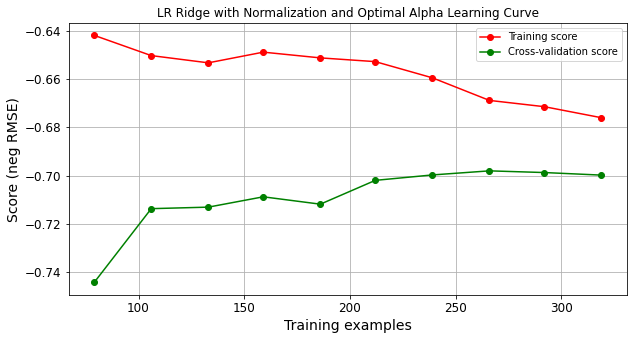

In [304]:
from sklearn.model_selection import learning_curve

X_wineRed_trainCV, X_wineRed_testCV, y_wineRed_trainCV, y_wineRed_testCV = train_test_split(X_wineRed_train, y_wineRed_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineRed_trainCV)
X_test_scaled = scaler.transform(X_wineRed_testCV)

linLasso = Lasso(alpha = 0.01).fit(X_train_scaled, y_wineRed_trainCV)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linLasso, X_train_scaled, y_wineRed_trainCV, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('LR Ridge with Normalization and Optimal Alpha Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Lasso Regression with Optimal Alpha Using Test Set

In [305]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_wineRed_train)
X_test_scaled = scaler.fit_transform(X_wineRed_test)

linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_wineRed_train)

print('Red Wine dataset')
print('R-squared score (train): {:.3f}\n'
     .format(linlasso.score(X_train_scaled, y_wineRed_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_wineRed_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test_scaled)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineRed_test, y_pred))))

print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))

print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_wineWhite_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
print('******************************************************************')

Red Wine dataset
R-squared score (train): 0.563

R-squared score (test): 0.584

RMSE: 301.058
lasso regression linear model intercept: 10.542340635299508
lasso regression linear model coeff:
[ 2.88746351 -0.          0.48241894  1.78842277 -0.48350624 -0.
 -0.46604284 -4.91565055  2.19220626  0.72429457]
Non-zero features: 8
Features with non-zero weight (sorted by absolute magnitude):
	density, -4.916
	fixed acidity, 2.887
	pH, 2.192
	residual sugar, 1.788
	sulphates, 0.724
	chlorides, -0.484
	citric acid, 0.482
	total sulfur dioxide, -0.466
******************************************************************


[[-0.65928111 -0.52861059 -0.68186714 -0.53642487 -0.59641049 -0.59098118
  -0.60215368 -0.5699865  -0.6022837  -0.49518269]
 [-0.63193372 -0.54313846 -0.710377   -0.54633146 -0.60167301 -0.60720407
  -0.6457094  -0.5603762  -0.61964171 -0.61160309]
 [-0.65220822 -0.59650836 -0.68430178 -0.57598411 -0.58197549 -0.63758023
  -0.64036784 -0.57700767 -0.59112044 -0.62618632]
 [-0.63135225 -0.58406644 -0.68626468 -0.56263206 -0.59312989 -0.63832418
  -0.63624405 -0.58819571 -0.59707702 -0.63743426]
 [-0.65741875 -0.64122003 -0.70071299 -0.6155485  -0.59170561 -0.65198362
  -0.64037582 -0.59769507 -0.59820089 -0.62217746]
 [-0.64907101 -0.63014439 -0.73304167 -0.60852697 -0.6085366  -0.63233158
  -0.63153355 -0.62327177 -0.57966665 -0.66147829]
 [-0.63380266 -0.64381708 -0.7163443  -0.63553694 -0.60211733 -0.62780637
  -0.6198498  -0.64282985 -0.58838341 -0.65529969]
 [-0.64014423 -0.63896038 -0.69798473 -0.62872253 -0.63539401 -0.62983957
  -0.62881749 -0.6671127  -0.59832096 -0.65821054]


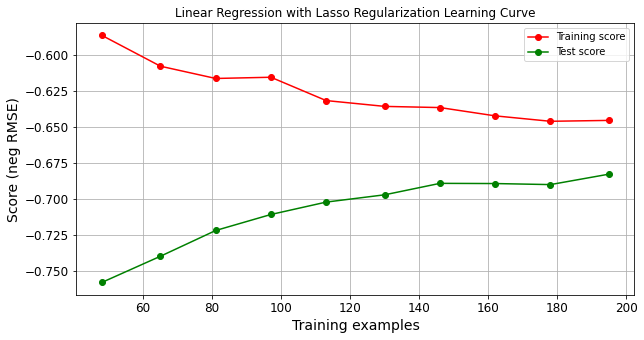

In [306]:
from sklearn.model_selection import learning_curve

X_test_scaled = scaler.transform(X_wineRed_test)
linLasso = Lasso(alpha=0.01).fit(X_test_scaled, y_wineRed_test)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linLasso, X_test_scaled, y_wineRed_test, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression with Lasso Regularization Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Polynomial Regression Models

### White Wine

(1) Training and Validation Set

In [307]:
from sklearn.preprocessing import PolynomialFeatures

print('White Wine dataset')
X_train, X_test, y_train, y_test = train_test_split(X_wineWhite_train, y_wineWhite_train, random_state=0)

for d in [1,2,3,4,5,6,7,8]:
    print('Polynomial Regression Degree: {}'.format(d))
    polynomial_features = PolynomialFeatures(degree=d)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)
    PolyReg = LinearRegression()
    PolyReg.fit(X_poly_train, y_train)
    print('\t R-squared score (training): {:.3f}'
         .format(PolyReg.score(X_poly_train, y_train)))
    print('\t R-squared score (test): {:.3f}'
         .format(PolyReg.score(X_poly_test, y_test)))
    # make predictions on the testing set
    y_pred = PolyReg.predict(X_poly_test)
    print('\t RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

White Wine dataset
Polynomial Regression Degree: 1
	 R-squared score (training): 0.913
	 R-squared score (test): 0.907
	 RMSE: 0.363
Polynomial Regression Degree: 2
	 R-squared score (training): 0.929
	 R-squared score (test): 0.913
	 RMSE: 0.351
Polynomial Regression Degree: 3
	 R-squared score (training): 0.951
	 R-squared score (test): 0.841
	 RMSE: 0.475
Polynomial Regression Degree: 4
	 R-squared score (training): 0.987
	 R-squared score (test): -23.087
	 RMSE: 5.853
Polynomial Regression Degree: 5
	 R-squared score (training): 1.000
	 R-squared score (test): -5623.129
	 RMSE: 89.431
Polynomial Regression Degree: 6
	 R-squared score (training): 1.000
	 R-squared score (test): -14055.684
	 RMSE: 141.384
Polynomial Regression Degree: 7
	 R-squared score (training): 1.000
	 R-squared score (test): -317395.430
	 RMSE: 671.833
Polynomial Regression Degree: 8
	 R-squared score (training): 0.999
	 R-squared score (test): -1880259.460
	 RMSE: 1635.194


(2) Test Set

In [308]:
from sklearn.preprocessing import PolynomialFeatures

print('White Wine dataset')
# X_train, X_test, y_train, y_test = train_test_split(X_wineWhite_test, y_wineWhite_train, random_state=0)

# for d in [1,2,3,4,5,6,7,8]:
print('Polynomial Regression Degree: {}'.format(1))
polynomial_features = PolynomialFeatures(degree=1)
X_poly_train = polynomial_features.fit_transform(X_wineWhite_train)
X_poly_test = polynomial_features.transform(X_wineWhite_test)
PolyReg = LinearRegression()
PolyReg.fit(X_poly_train, y_wineWhite_train)
print('\t R-squared score (training): {:.3f}'
     .format(PolyReg.score(X_poly_train, y_wineWhite_train)))
print('\t R-squared score (test): {:.3f}'
     .format(PolyReg.score(X_poly_test, y_wineWhite_test)))
# make predictions on the testing set
y_pred = PolyReg.predict(X_poly_test)
print('\t RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred))))

White Wine dataset
Polynomial Regression Degree: 1
	 R-squared score (training): 0.912
	 R-squared score (test): 0.895
	 RMSE: 0.397


### Red Wine

(1) Training - Validation Set

In [309]:
from sklearn.preprocessing import PolynomialFeatures
print('Red Wine dataset')
X_train, X_test, y_train, y_test = train_test_split(X_wineRed_train, y_wineRed_train, random_state=0)
for d in [1,2,3,4,5,6,7,8]:
    print('Polynomial Regression Degree: {}'.format(d))
    polynomial_features = PolynomialFeatures(degree=d)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)
    PolyReg = LinearRegression()
    PolyReg.fit(X_poly_train, y_train)
    print('\t R-squared score (training): {:.3f}'
         .format(PolyReg.score(X_poly_train, y_train)))
    print('\t R-squared score (test): {:.3f}'
         .format(PolyReg.score(X_poly_test, y_test)))
    # make predictions on the testing set
    y_pred = PolyReg.predict(X_poly_test)
    print('\t RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Red Wine dataset
Polynomial Regression Degree: 1
	 R-squared score (training): 0.636
	 R-squared score (test): 0.689
	 RMSE: 0.617
Polynomial Regression Degree: 2
	 R-squared score (training): 0.817
	 R-squared score (test): 0.322
	 RMSE: 0.910
Polynomial Regression Degree: 3
	 R-squared score (training): 0.940
	 R-squared score (test): -203.689
	 RMSE: 15.811
Polynomial Regression Degree: 4
	 R-squared score (training): 1.000
	 R-squared score (test): -144721.454
	 RMSE: 420.408
Polynomial Regression Degree: 5
	 R-squared score (training): 1.000
	 R-squared score (test): -25558868.182
	 RMSE: 5586.942
Polynomial Regression Degree: 6
	 R-squared score (training): 1.000
	 R-squared score (test): -35970589.700
	 RMSE: 6627.918
Polynomial Regression Degree: 7
	 R-squared score (training): 1.000
	 R-squared score (test): -28759230960.891
	 RMSE: 187409.672
Polynomial Regression Degree: 8
	 R-squared score (training): 1.000
	 R-squared score (test): -18032463639217.512
	 RMSE: 4692787.604


(2) Testing Set

In [310]:
from sklearn.preprocessing import PolynomialFeatures

print('White Wine dataset')
# X_train, X_test, y_train, y_test = train_test_split(X_wineWhite_test, y_wineWhite_train, random_state=0)

# for d in [1,2,3,4,5,6,7,8]:
print('Polynomial Regression Degree: {}'.format(1))
polynomial_features = PolynomialFeatures(degree=1)
X_poly_train = polynomial_features.fit_transform(X_wineRed_train)
X_poly_test = polynomial_features.transform(X_wineRed_test)
PolyReg = LinearRegression()
PolyReg.fit(X_poly_train, y_wineRed_train)
print('\t R-squared score (training): {:.3f}'
     .format(PolyReg.score(X_poly_train, y_wineRed_train)))
print('\t R-squared score (test): {:.3f}'
     .format(PolyReg.score(X_poly_test, y_wineRed_test)))
# make predictions on the testing set
y_pred = PolyReg.predict(X_poly_test)
print('\t RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineRed_test, y_pred))))

White Wine dataset
Polynomial Regression Degree: 1
	 R-squared score (training): 0.656
	 R-squared score (test): 0.704
	 RMSE: 0.594
